## ***DecisionTree Classification***

### Data Set


In [1]:
# Wine Quality Data Set
# https://archive.ics.uci.edu/ml/datasets/Wine+Quality

!curl https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/

<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 3.2 Final//EN">
<html>
 <head>
  <title>Index of /ml/machine-learning-databases/wine-quality</title>
 </head>
 <body>
<h1>Index of /ml/machine-learning-databases/wine-quality</h1>
<ul><li><a href="/ml/machine-learning-databases/"> Parent Directory</a></li>
<li><a href="winequality-red.csv"> winequality-red.csv</a></li>
<li><a href="winequality-white.csv"> winequality-white.csv</a></li>
<li><a href="winequality.names"> winequality.names</a></li>
</ul>
<address>Apache/2.4.6 (CentOS) OpenSSL/1.0.2k-fips SVN/1.7.14 Phusion_Passenger/4.0.53 mod_perl/2.0.11 Perl/v5.16.3 Server at archive.ics.uci.edu Port 443</address>
</body></html>


In [2]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv

--2023-04-07 01:31:44--  https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 84199 (82K) [application/x-httpd-php]
Saving to: ‘winequality-red.csv’

winequality-red.csv 100%[===================>]  82.23K  --.-KB/s    in 0.02s   

2023-04-07 01:31:44 (4.41 MB/s) - ‘winequality-red.csv’ saved [84199/84199]



### Dependencies

In [3]:
# Numpy and Pandas
import numpy as np
import pandas as pd

# Splitting train and test sets
from sklearn.model_selection import train_test_split

# For Preprocessing
from sklearn.preprocessing import StandardScaler

# For visualzing tree and plotting
from sklearn import tree
import matplotlib.pyplot as plt 

# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

# Results
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

### Load Dataset

In [4]:
!wc -l winequality-red.csv

1600 winequality-red.csv


In [5]:
!sed -i 's/;/,/g' winequality-red.csv 

In [7]:
# Read dataset from csv files
# df = pd.read_csv("winequality-red.csv")
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-'+'databases/balance-scale/balance-scale.data', sep= ',', header = None)

df.head()

,0,1,2,3,4
0,B,1,1,1,1
1,R,1,1,1,2
2,R,1,1,1,3
3,R,1,1,1,4
4,R,1,1,1,5


In [8]:
df.columns

Int64Index([0, 1, 2, 3, 4], dtype='int64')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625 entries, 0 to 624
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       625 non-null    object
 1   1       625 non-null    int64 
 2   2       625 non-null    int64 
 3   3       625 non-null    int64 
 4   4       625 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 24.5+ KB


In [10]:
df.describe()

,1,2,3,4
count,625.000000,625.000000,625.000000,625.000000
mean,3.000000,3.000000,3.000000,3.000000
std,1.415346,1.415346,1.415346,1.415346
min,1.000000,1.000000,1.000000,1.000000
25%,2.000000,2.000000,2.000000,2.000000
50%,3.000000,3.000000,3.000000,3.000000
75%,4.000000,4.000000,4.000000,4.000000
max,5.000000,5.000000,5.000000,5.000000


### Preprocessing

In [12]:
df[df.columns[1:-1]]

,1,2,3
0,1,1,1
1,1,1,1
2,1,1,1
3,1,1,1
4,1,1,1
...,...,...,...
620,5,5,5
621,5,5,5
622,5,5,5
623,5,5,5


In [13]:
df[df.columns[0:1]]

,0
0,B
1,R
2,R
3,R
4,R
...,...
620,L
621,L
622,L
623,L


In [17]:
# Getting data and its target seperate
X = df[df.columns[1:-1]].values
Y = df[df.columns[0:1]].values

In [18]:
X

array([[1, 1, 1],
       [1, 1, 1],
       [1, 1, 1],
       ...,
       [5, 5, 5],
       [5, 5, 5],
       [5, 5, 5]])

In [21]:
Y[0:5]

array([['B'],
       ['R'],
       ['R'],
       ['R'],
       ['R']], dtype=object)

### Train and Test Splits

In [22]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

### Classification Using GINI Index

In [23]:
clf_gini = DecisionTreeClassifier(criterion="gini", random_state=100, 
                                  max_depth=3, min_samples_leaf=5)

# Training
clf_gini.fit(x_train, y_train) 

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=100)

In [24]:
# Prediction
y_pred_gini = clf_gini.predict(x_test)
print("Predicted values:")
print(y_pred_gini)
print()

Predicted values:
['L' 'L' 'R' 'R' 'L' 'R' 'R' 'L' 'L' 'R' 'R' 'R' 'R' 'R' 'L' 'L' 'R' 'L'
 'R' 'R' 'R' 'R' 'R' 'L' 'L' 'R' 'L' 'L' 'L' 'L' 'L' 'R' 'R' 'L' 'R' 'L'
 'L' 'L' 'R' 'L' 'L' 'R' 'R' 'L' 'L' 'L' 'R' 'R' 'L' 'L' 'L' 'L' 'R' 'L'
 'L' 'L' 'R' 'L' 'R' 'R' 'L' 'L' 'R' 'L' 'L' 'L' 'R' 'R' 'R' 'R' 'R' 'R'
 'L' 'R' 'R' 'R' 'L' 'R' 'L' 'R' 'L' 'R' 'R' 'L' 'L' 'L' 'L' 'L' 'R' 'L'
 'L' 'L' 'R' 'L' 'L' 'R' 'R' 'R' 'R' 'R' 'L' 'L' 'R' 'L' 'L' 'L' 'L' 'L'
 'L' 'L' 'R' 'R' 'R' 'L' 'L' 'R' 'L' 'L' 'L' 'R' 'R' 'L' 'L' 'R' 'R' 'R'
 'L' 'R' 'L' 'R' 'L' 'L' 'L' 'L' 'L' 'L' 'R' 'R' 'R' 'L' 'R' 'L' 'R' 'R'
 'R' 'R' 'R' 'L' 'R' 'R' 'R' 'L' 'L' 'L' 'L' 'R' 'R' 'L' 'R' 'L' 'L' 'R'
 'R' 'L' 'R' 'R' 'R' 'L' 'R' 'L' 'L' 'R' 'L' 'R' 'L' 'L' 'L' 'L' 'R' 'L'
 'R' 'R' 'L' 'R' 'L' 'R' 'R' 'L']



In [25]:
# Confusion Matrix
print("Confusion Matrix: ")
print(confusion_matrix(y_test, y_pred_gini))
print()

# Accuracy
print ("Accuracy : ")
print(accuracy_score(y_test,y_pred_gini)*100)
print()

# Classification Report
print("Report : ")
print(classification_report(y_test, y_pred_gini))
print()

Confusion Matrix: 
[[ 0 10  8]
 [ 0 63 17]
 [ 0 25 65]]

Accuracy : 
68.08510638297872

Report : 
              precision    recall  f1-score   support

           B       0.00      0.00      0.00        18
           L       0.64      0.79      0.71        80
           R       0.72      0.72      0.72        90

    accuracy                           0.68       188
   macro avg       0.46      0.50      0.48       188
weighted avg       0.62      0.68      0.65       188




/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [34]:
df[0].unique()

array(['B', 'R', 'L'], dtype=object)

In [31]:
df.columns

Int64Index([0, 1, 2, 3, 4], dtype='int64')

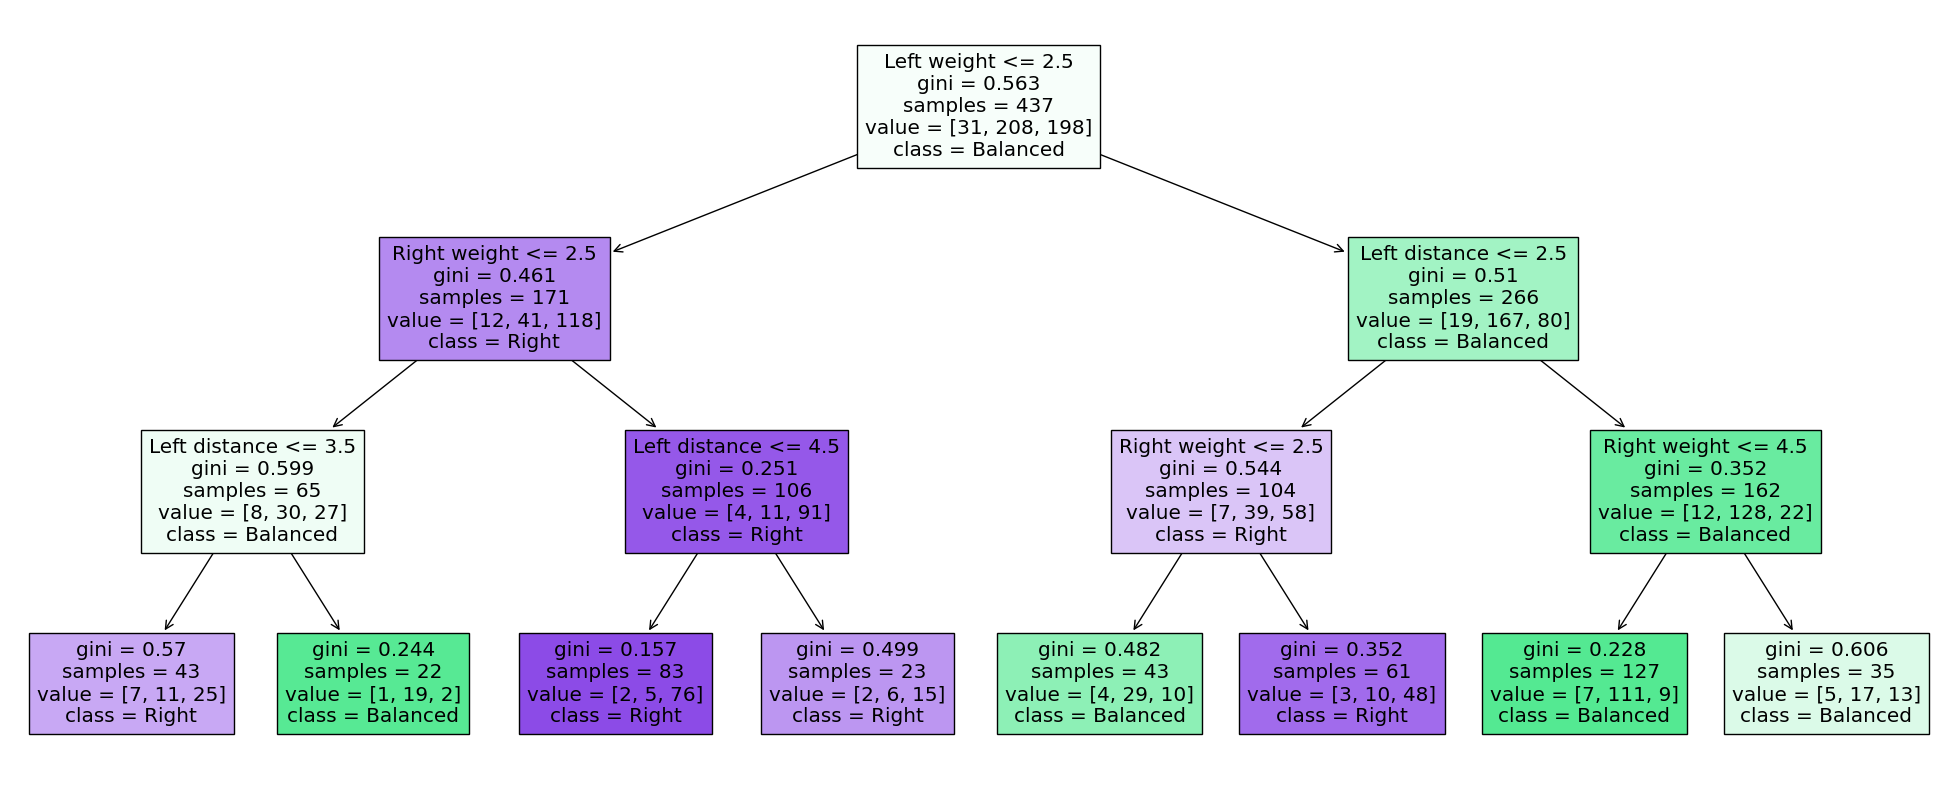

In [38]:
plt.figure(figsize=(25,10))
gini_plot = tree.plot_tree(clf_gini, filled=True,
                          feature_names=["Left weight","Left distance","Right weight","Right distance"],
                          class_names=["Left","Balanced","Right"])

### Classification Using Entropy

In [39]:
clf_entropy = DecisionTreeClassifier(criterion="entropy", random_state=100, 
                                  max_depth=3, min_samples_leaf=5)

# Training
clf_entropy.fit(x_train, y_train) 

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5,
                       random_state=100)

In [40]:
# Prediction
y_pred_entropy = clf_entropy.predict(x_test)
print("Predicted values:")
print(y_pred_entropy)
print()

Predicted values:
['L' 'L' 'R' 'R' 'L' 'R' 'R' 'L' 'L' 'R' 'R' 'R' 'R' 'R' 'L' 'L' 'R' 'L'
 'R' 'R' 'R' 'R' 'R' 'L' 'L' 'R' 'L' 'L' 'L' 'L' 'L' 'R' 'R' 'L' 'R' 'L'
 'L' 'L' 'R' 'L' 'L' 'R' 'R' 'L' 'L' 'L' 'R' 'R' 'L' 'L' 'L' 'L' 'R' 'L'
 'L' 'L' 'R' 'L' 'R' 'R' 'L' 'L' 'R' 'L' 'L' 'L' 'R' 'R' 'R' 'R' 'R' 'R'
 'L' 'R' 'R' 'R' 'L' 'R' 'L' 'R' 'L' 'R' 'R' 'L' 'L' 'L' 'L' 'L' 'R' 'L'
 'L' 'L' 'R' 'L' 'L' 'R' 'R' 'R' 'R' 'R' 'L' 'L' 'R' 'L' 'L' 'L' 'L' 'L'
 'L' 'L' 'R' 'R' 'R' 'L' 'L' 'R' 'L' 'L' 'L' 'R' 'R' 'L' 'L' 'R' 'R' 'R'
 'L' 'R' 'L' 'R' 'L' 'L' 'L' 'L' 'L' 'L' 'R' 'R' 'R' 'L' 'R' 'L' 'R' 'R'
 'R' 'R' 'R' 'L' 'R' 'R' 'R' 'L' 'L' 'L' 'L' 'R' 'R' 'L' 'R' 'L' 'L' 'R'
 'R' 'L' 'R' 'R' 'R' 'L' 'R' 'L' 'L' 'R' 'L' 'R' 'L' 'L' 'L' 'L' 'R' 'L'
 'R' 'R' 'L' 'R' 'L' 'R' 'R' 'L']



In [41]:
# Confusion Matrix
print("Confusion Matrix: ")
print(confusion_matrix(y_test, y_pred_entropy))
print()

# Accuracy
print ("Accuracy : ")
print(accuracy_score(y_test,y_pred_entropy)*100)
print()

# Classification Report
print("Report : ")
print(classification_report(y_test, y_pred_entropy))
print()

Confusion Matrix: 
[[ 0 10  8]
 [ 0 63 17]
 [ 0 25 65]]

Accuracy : 
68.08510638297872

Report : 
              precision    recall  f1-score   support

           B       0.00      0.00      0.00        18
           L       0.64      0.79      0.71        80
           R       0.72      0.72      0.72        90

    accuracy                           0.68       188
   macro avg       0.46      0.50      0.48       188
weighted avg       0.62      0.68      0.65       188




/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


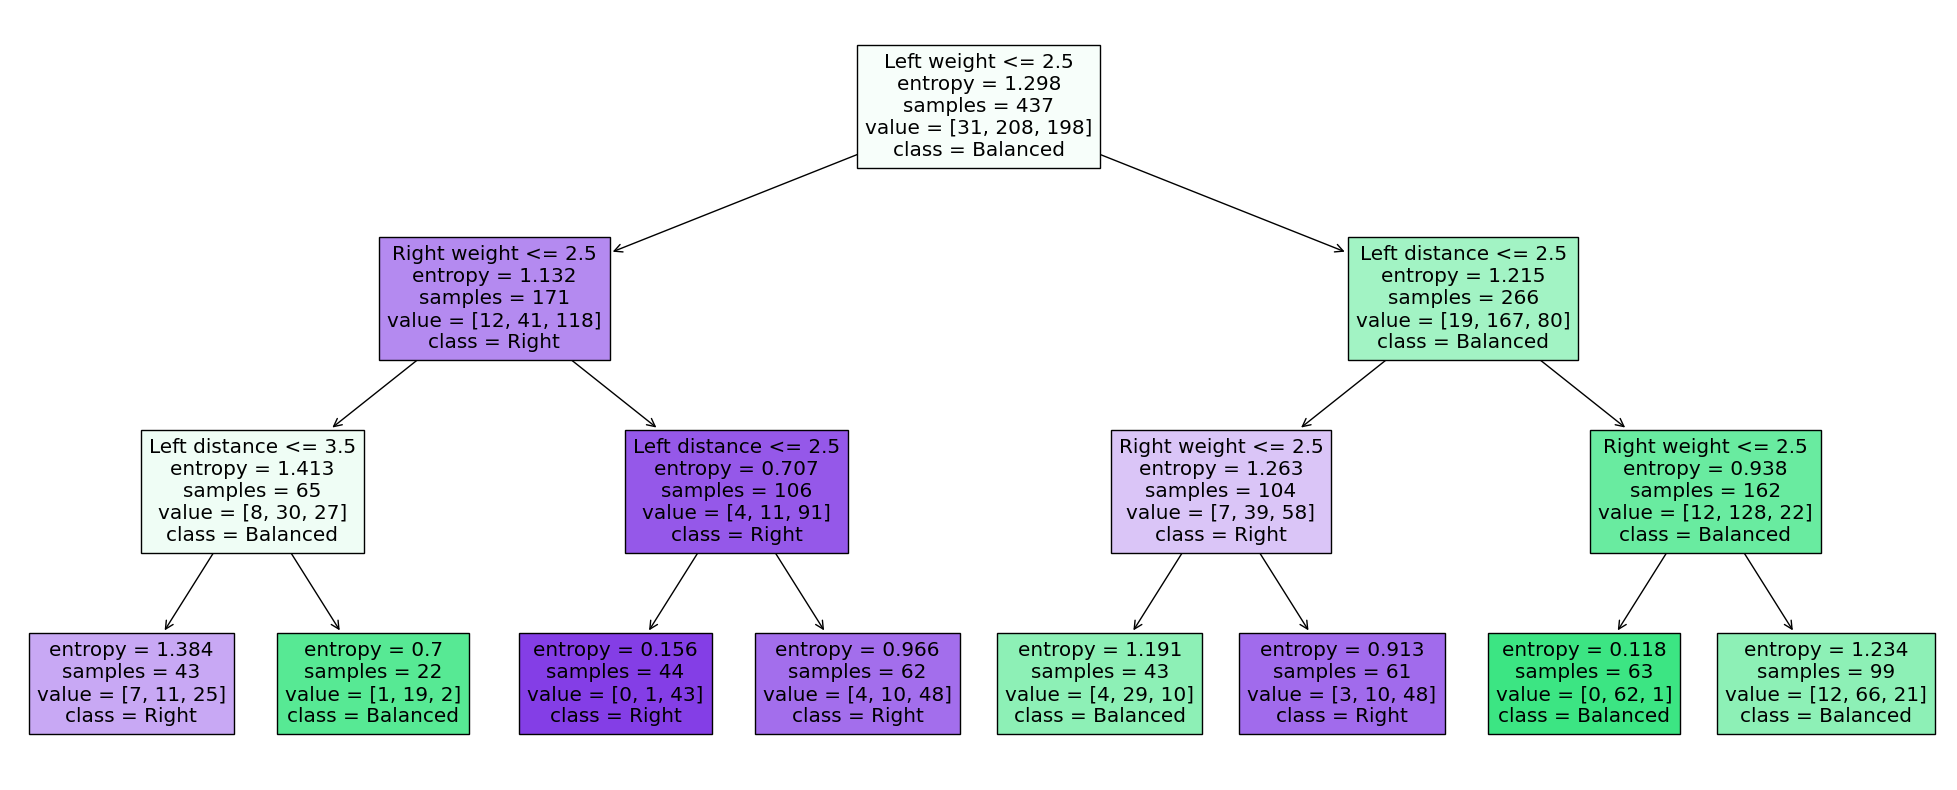

In [53]:
plt.figure(figsize=(25,10))
gini_plot = tree.plot_tree(clf_entropy, filled=True,
                          feature_names=["Left weight","Left distance","Right weight","Right distance"],
                          class_names=["Left","Balanced","Right"]
                          )

## ***K-Means Clustering***

### Dependencies

In [43]:
from sklearn.cluster import KMeans
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

### Dataset

In [44]:
dataset = datasets.load_iris()
X = dataset.data
Y = dataset.target
cols = dataset.feature_names

X, Y = shuffle(X, Y, random_state=42)

In [45]:
cols

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

### Clustering

In [46]:
kmeans = KMeans(n_clusters=3, random_state=42)
data = kmeans.fit(X)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [47]:
data.labels_

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 1,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 2, 1, 2, 1, 2, 1, 0, 2, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 2, 0, 1, 1, 0, 1, 1, 1, 1, 2, 1, 0, 1, 2, 0, 0, 1, 2, 0, 1, 0,
       0, 1, 1, 2, 1, 2, 2, 1, 0, 0, 1, 2, 0, 0, 0, 1, 2, 0, 2, 2, 0, 1,
       1, 1, 1, 2, 0, 2, 1, 2, 1, 1, 1, 0, 1, 1, 0, 1, 2, 2, 0, 1, 2, 2,
       0, 2, 0, 2, 2, 2, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 1, 2], dtype=int32)

In [48]:
Y = np.choose(Y, [1, 2, 0]).astype(int)
Y

array([2, 1, 0, 2, 2, 1, 2, 0, 2, 2, 0, 1, 1, 1, 1, 2, 0, 2, 2, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 1, 1, 0, 2, 1, 1, 1, 0, 2, 2, 1,
       1, 2, 0, 0, 2, 0, 2, 0, 2, 1, 0, 2, 1, 1, 1, 2, 0, 1, 1, 1, 2, 1,
       2, 0, 1, 2, 0, 1, 0, 0, 2, 2, 0, 2, 1, 2, 0, 1, 1, 2, 2, 1, 0, 1,
       1, 2, 2, 0, 2, 0, 0, 2, 1, 1, 0, 0, 1, 1, 1, 2, 0, 1, 0, 0, 1, 2,
       2, 0, 2, 0, 1, 0, 2, 0, 2, 2, 2, 1, 2, 2, 1, 2, 0, 0, 1, 2, 0, 0,
       1, 0, 1, 2, 0, 0, 2, 0, 2, 2, 0, 0, 1, 2, 0, 1, 2, 0])

In [49]:
data.cluster_centers_

array([[5.006     , 3.428     , 1.462     , 0.246     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

### Visualizing

In [50]:
conf_matrix = confusion_matrix(Y, data.labels_)
print(conf_matrix)

[[ 0 14 36]
 [50  0  0]
 [ 0 48  2]]


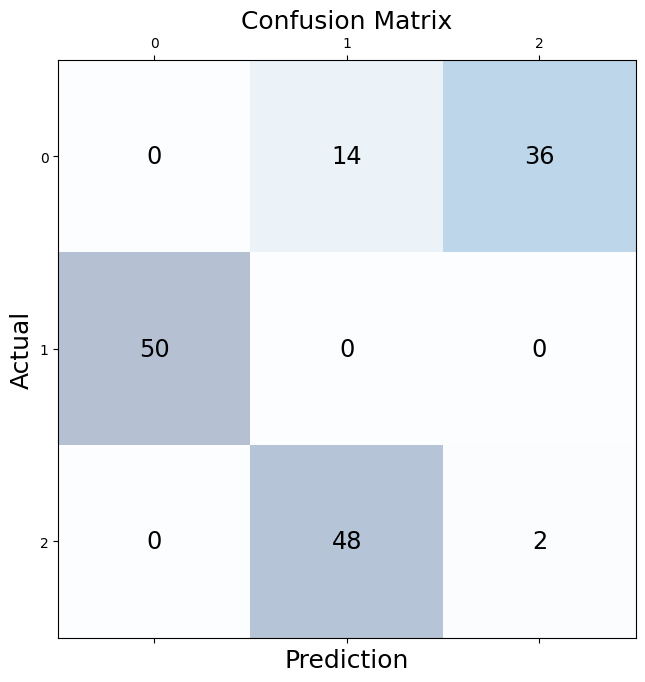

In [51]:
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', 
                ha='center', size='xx-large')
 
plt.xlabel('Prediction', fontsize=18)
plt.ylabel('Actual', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

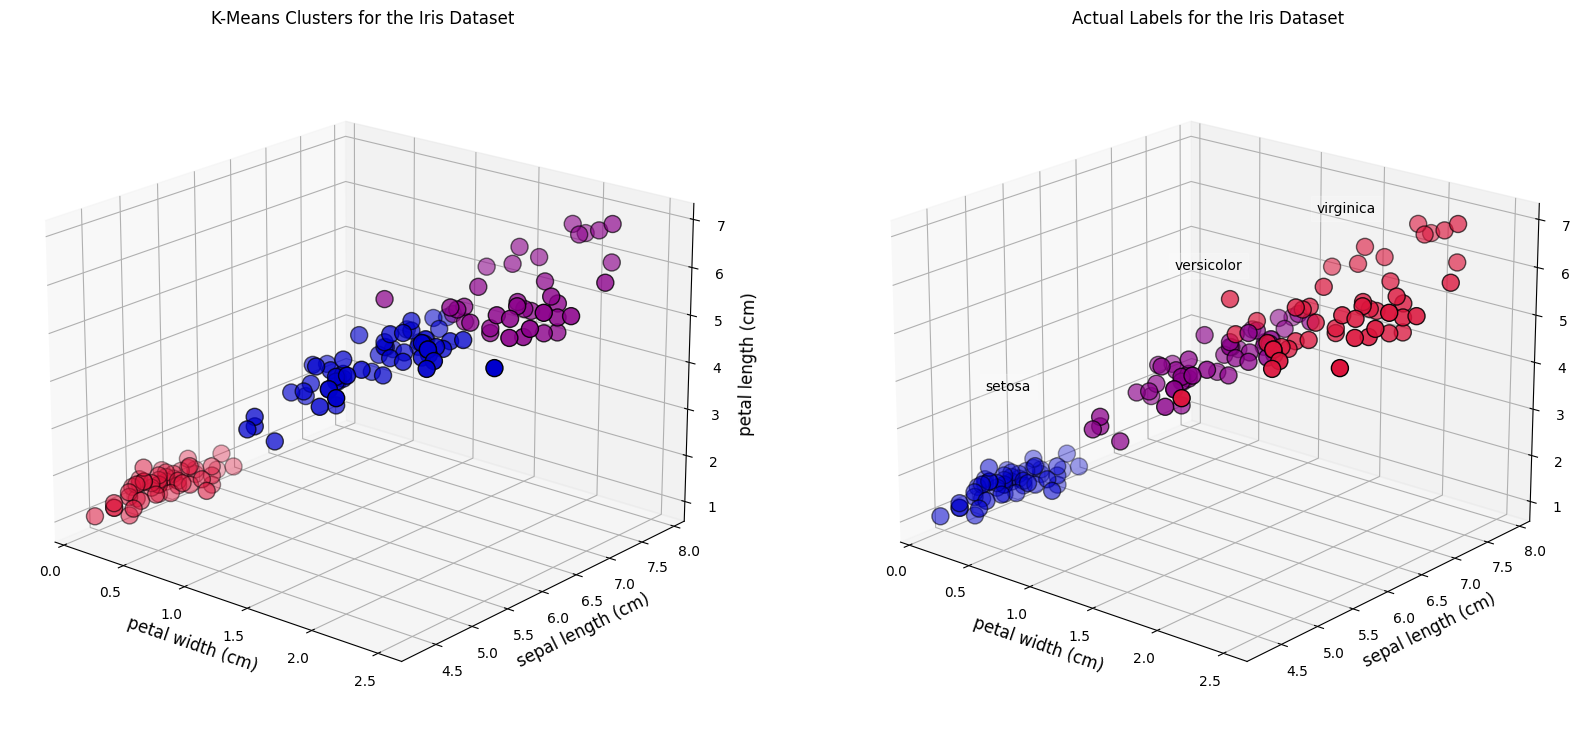

In [52]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline
customcmap = ListedColormap(["crimson", "mediumblue", "darkmagenta"])

fig = plt.figure(figsize=(20, 10))
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax1.scatter(X[:, 3], X[:, 0], X[:, 2], 
            c=data.labels_.astype(float), 
           edgecolor="k", s=150, cmap=customcmap)
ax1.view_init(20, -50)
ax1.set_xlabel(cols[3], fontsize=12)
ax1.set_ylabel(cols[0], fontsize=12)
ax1.set_zlabel(cols[2], fontsize=12)
ax1.set_title("K-Means Clusters for the Iris Dataset", fontsize=12)

ax2 = fig.add_subplot(1, 2, 2, projection='3d')

for label, name in enumerate(['virginica','setosa','versicolor']):
    ax2.text3D(
        X[Y == label, 3].mean(),
        X[Y == label, 0].mean(),
        X[Y == label, 2].mean() + 2,
        name,
        horizontalalignment="center",
        bbox=dict(alpha=0.2, edgecolor="w", facecolor="w"),
    )
ax2.scatter(X[:, 3], X[:, 0], X[:, 2], 
            c=Y, edgecolor="k", s=150, 
            cmap=customcmap)
ax2.view_init(20, -50)
ax2.set_xlabel(cols[3], fontsize=12)
ax2.set_ylabel(cols[0], fontsize=12)
ax2.set_zlabel(cols[2], fontsize=12)
ax2.set_title("Actual Labels for the Iris Dataset", fontsize=12)
fig.show()